In [1]:
#loading dtaset
import pandas as pd

In [2]:
df=pd.read_csv("Wine.csv")

In [3]:
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
%whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>


In [7]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [8]:
df.shape

(178, 13)

In [10]:
#finding different quartile values
import numpy as np
Q1= np.percentile(df['Malic_Acid'], 25, interpolation='midpoint')
Q2= np.percentile(df['Malic_Acid'], 50, interpolation='midpoint')
Q3= np.percentile(df['Malic_Acid'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

1.605
1.8650000000000002
3.065
-0.585
5.255


In [12]:
outlier=[]
for x in df['Malic_Acid']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier

[5.8, 5.51, 5.65]

In [15]:
ind1 = df['Malic_Acid'] > up_lim             # finding index of these outliers.
df.loc[ind1].index

Int64Index([123, 137, 173], dtype='int64')

In [16]:
df.drop([ 123, 137, 173], inplace= True)

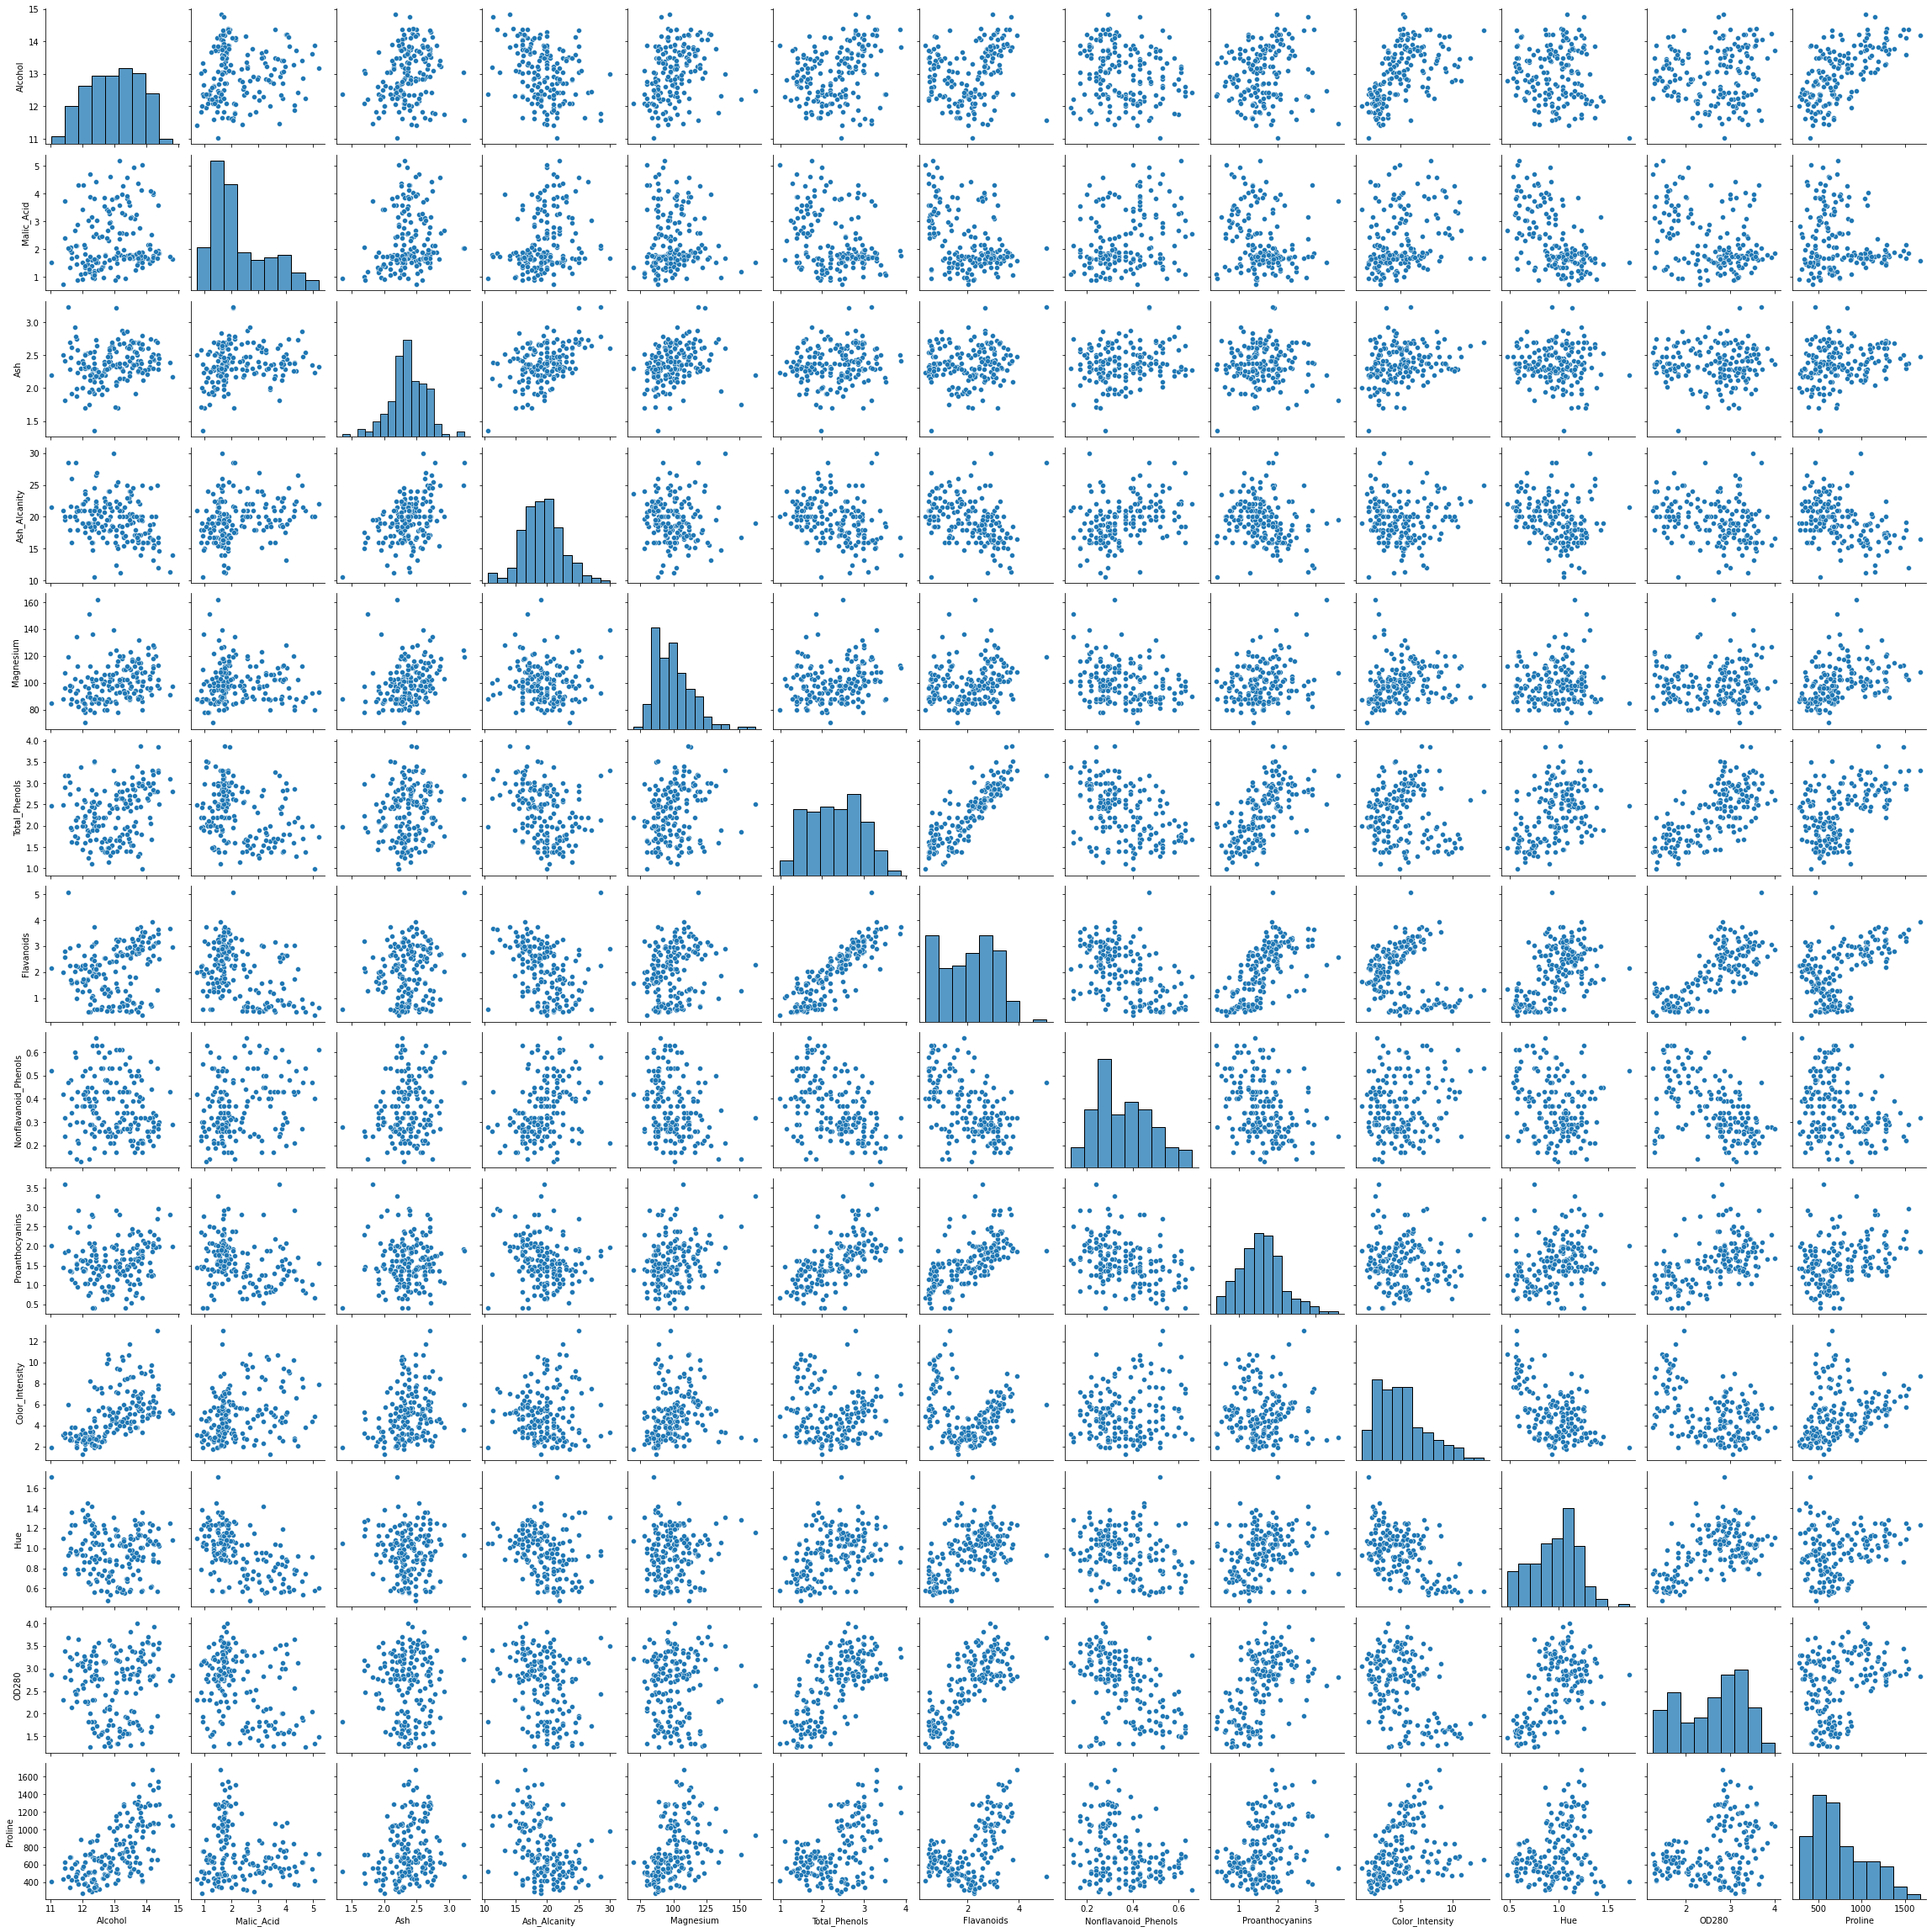

In [19]:
import seaborn as sns
sns.pairplot(df)

# Tryout diffrent clustering models

In [23]:

#kmeans
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=4)
model_kmeans.fit(df)
labels=model_kmeans.predict(df)
print(labels)

[1 1 3 3 2 3 3 3 1 1 3 3 3 1 3 3 3 1 3 1 2 2 1 1 1 1 3 3 1 1 3 3 1 3 1 1 1
 1 1 2 2 1 1 2 1 1 1 1 1 3 1 3 3 3 1 1 1 3 3 0 2 0 2 0 0 2 0 0 2 2 1 0 0 1
 1 0 0 0 2 0 0 2 2 0 0 0 0 2 2 2 0 0 0 0 0 1 2 0 2 0 2 2 0 0 2 0 0 0 0 2 2
 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 1 1 0 2 2 2
 0 0 0 2 2 2 0 1 2 2 0 2 2 2 2 0 2 2 2 2 0 0 2 2 1 1 2]


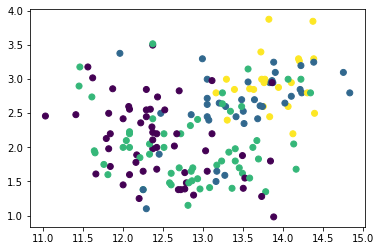

In [24]:
import matplotlib.pyplot as plt
x= df['Alcohol']
y= df['Total_Phenols']
plt.scatter(x,y, c=labels);

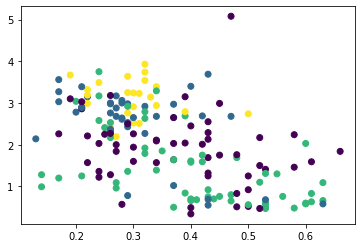

In [25]:
x= df['Nonflavanoid_Phenols']
y= df['Flavanoids']
plt.scatter(x,y, c=labels);

In [26]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(df, labels, metric='euclidean')
print("silhouette score for KMC is :", score)
print('Silhouette Score: %.4f' % score)

silhouette score for KMC is : 0.5605330642724322
Silhouette Score: 0.5605


In [ ]:
#kmeans clustering
import matplotlib.pyplot as plt

C:\Users\dasar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


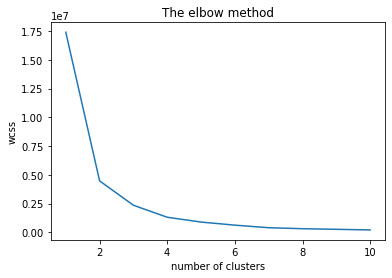

In [27]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [28]:
#kmeans
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df)
labels=model_kmeans.predict(df)
print(labels)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 2 2 0 0 2 2 0 2 2 0
 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 0]


In [29]:
model_kmeans.inertia_

2361009.276535438

In [30]:
ks=range(1,8)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

C:\Users\dasar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


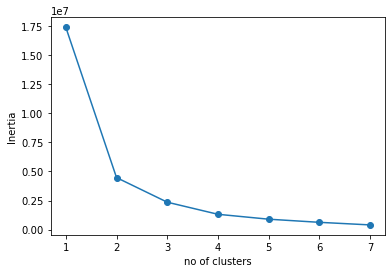

In [31]:
plt.plot(ks,inertia,'-o')
plt.xlabel("no of clusters")
plt.ylabel("Inertia")
plt.show()

In [32]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df)
labels=model_kmeans.predict(df)
print(labels)

[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 1 0 0 0 1 1 2
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1]


In [36]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(df, labels, metric='euclidean')
print('Silhouette Score for KMC: %.4f' % score)

Silhouette Score for KMC: 0.5683


# hierachial clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters= 3, affinity = 'euclidean', linkage = 'ward')
labels_a=agg.fit_predict(df)
print(labels_a)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 2 2 1 1 2 1
 1 1 1 2 1 2 1 2 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 2 1]


In [35]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(df, labels, metric='euclidean')
print("silhouette score for KMC is :", score)
print('Silhouette Score: %.4f' % score)

silhouette score for KMC is : 0.5682712902756096
Silhouette Score: 0.5683


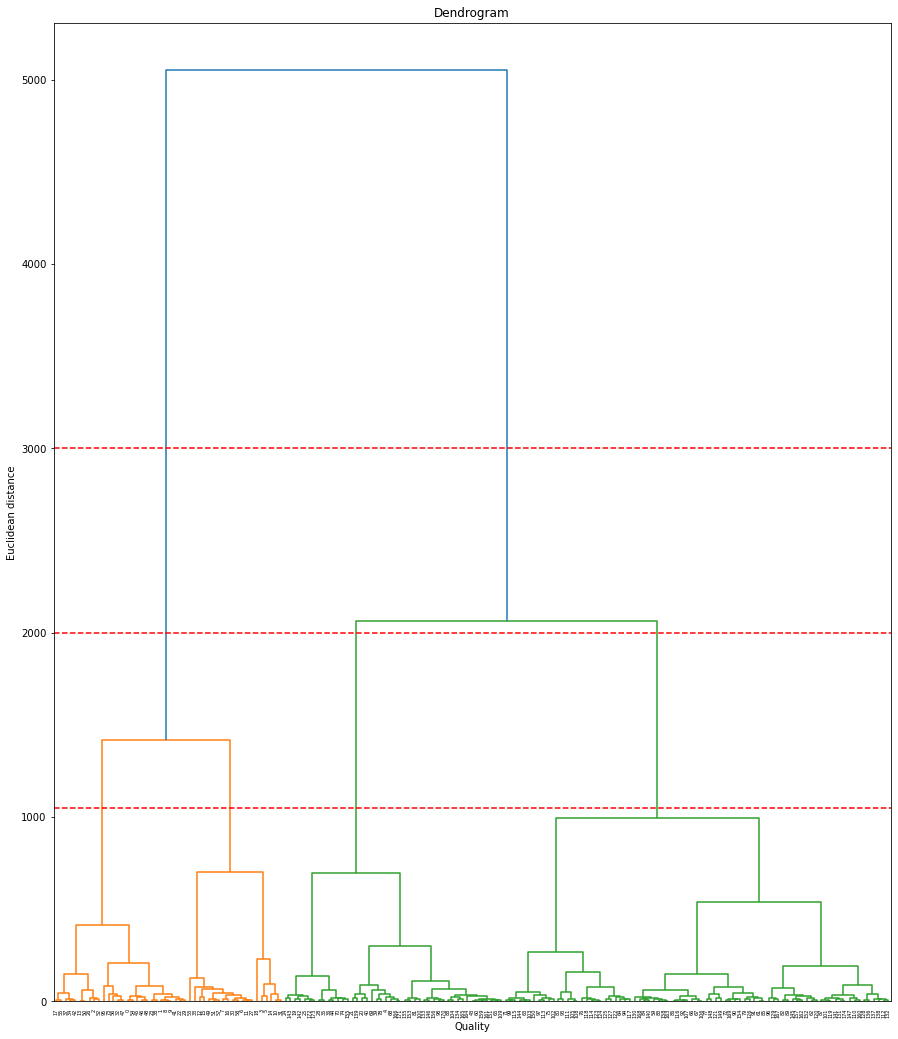

In [37]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,18))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Quality')
plt.ylabel('Euclidean distance')
plt.hlines(2000,0,5000, colors="r", linestyles="dashed")
plt.hlines(3000,0,5000, colors="r", linestyles="dashed")
plt.hlines(1050,0,5000, colors="r", linestyles="dashed")
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4 , affinity = 'euclidean', linkage = 'ward')
labels_a=cluster.fit_predict(df)
labels_a

array([3, 3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 3, 1, 2, 3, 1, 1, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0],
      dtype=int64)

In [39]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(df, labels, metric='euclidean')
print('Silhouette Score for KMC: %.4f' % score)

Silhouette Score for KMC: 0.5683


# findings
Silhouette Score: 0.5605,Silhouette Score for KMC: 0.5683 for kmeans

agglomerative also value is .5683


# scaling data

In [41]:
#standard scaling
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
scaled_data = standardisation.fit_transform(df)

In [46]:
ks=range(1,8)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

C:\Users\dasar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


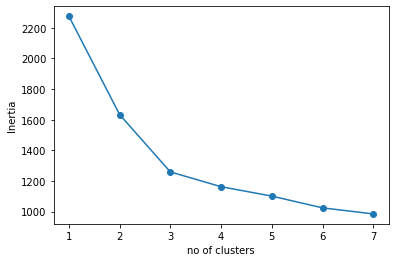

In [47]:
plt.plot(ks,inertia,'-o')
plt.xlabel("no of clusters")
plt.ylabel("Inertia")
plt.show()

In [49]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(scaled_data)
labels1 =model_k.predict(scaled_data)   
print(labels1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# from sklearn.metrics  import silhouette_score
score=silhouette_score(df, labels, metric='euclidean')
print('Silhouette Score for KMC: %.4f' % score)

# agglomerative

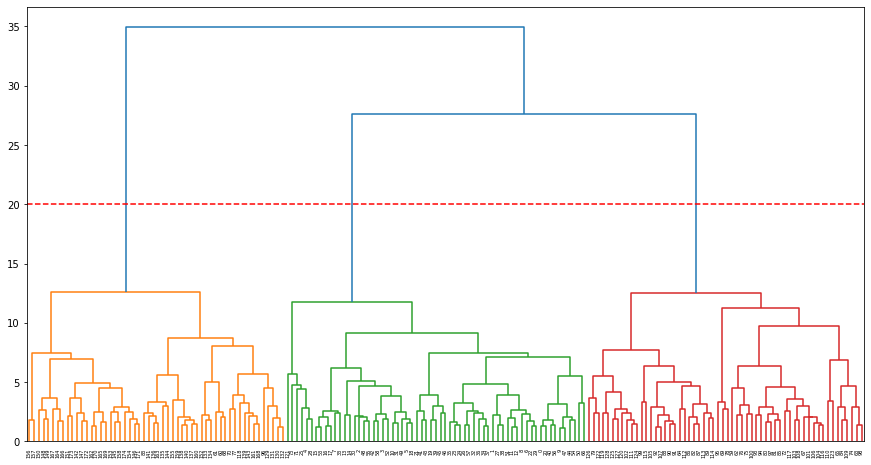

In [51]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(20,0,5000, colors='r', linestyles='dashed')
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3 , affinity = 'euclidean', linkage = 'ward')
labels_a1=cluster.fit_predict(scaled_data)
labels_a1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [54]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(scaled_data, labels_a, metric='euclidean')
print('Silhouette Score: %.4f' % score)

Silhouette Score: 0.2768


# PCA

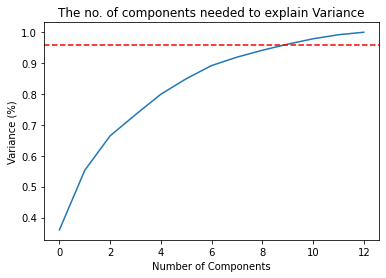

In [55]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components', fontsize = 10)
plt.ylabel('Variance (%)', fontsize = 10) 
plt.title('The no. of components needed to explain Variance', fontsize = 12)

plt.axhline(y=0.96, color='r', linestyle='dashed')
plt.show()

In [56]:
pca = PCA(n_components = 9)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(175, 9)

In [57]:
pca.components_

array([[-0.14933031,  0.24257977, -0.00560543,  0.23536592, -0.1423494 ,
        -0.39711959, -0.42437916,  0.29356918, -0.31361277,  0.08578042,
        -0.29607286, -0.37616001, -0.29036595],
       [-0.47804082, -0.2441143 , -0.3141501 ,  0.00647131, -0.29829176,
        -0.06380672,  0.00253864, -0.02341336, -0.04187938, -0.5291427 ,
         0.28702546,  0.1649275 , -0.35807617],
       [-0.2099932 ,  0.07594576,  0.62735926,  0.61652506,  0.13053939,
         0.13826051,  0.14757202,  0.17070271,  0.14352713, -0.13385813,
         0.08450243,  0.16377296, -0.12999469],
       [-0.13380145,  0.50432262, -0.23922248,  0.07975352, -0.11706268,
         0.13745879,  0.10934885, -0.36190447,  0.42950948,  0.04802808,
        -0.45339198,  0.14619039, -0.27370831],
       [-0.22928686, -0.09813098, -0.06608564,  0.03462401,  0.80470572,
        -0.2060055 , -0.153551  , -0.42179762, -0.02155095, -0.12375747,
        -0.01141936, -0.14341942, -0.06535394],
       [-0.207097  , -0.537969

C:\Users\dasar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17401448.007357772
4476065.118123963
2361009.276535438
1320698.7034275224
899294.1112044364
630240.9260766043
407266.240725311


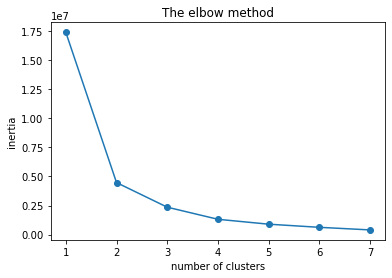

In [59]:
inertia=[]
for k in range (1,8):
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)
    print(model.inertia_)
plt.plot(range(1,8),inertia,'-o')
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [61]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(x_pca)
labels_k1 =model_k.predict(x_pca)   
print(labels_k1)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [62]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(x_pca, labels_k, metric='euclidean')
print('Silhouette Score: %.4f' % score)

Silhouette Score: 0.3052


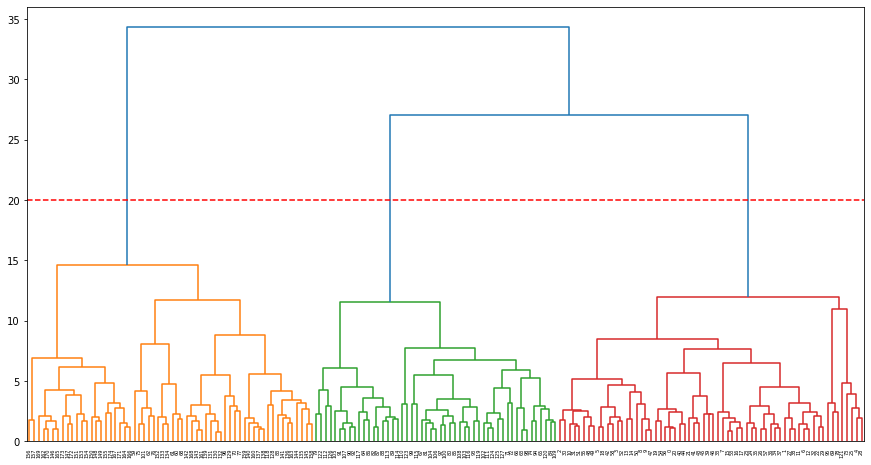

In [63]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(x_pca, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(20,0,5000, colors='r', linestyles='dashed')
plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3 , affinity = 'euclidean', linkage = 'ward')
labels_a=cluster.fit_predict(x_pca)
labels_a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [65]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(x_pca, labels_a, metric='euclidean')
print('Silhouette Score: %.4f' % score)

Silhouette Score: 0.2773
